In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
plt.style.use('seaborn-bright')

/tmp/ipykernel_18775/1458107253.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [3]:
lonlats = [
(14.6471, 121.0721),
(14.5987, 121.0892),
(14.5414, 121.1156),
(14.5837, 121.0061),
(14.4896, 121.0521),
(14.6705, 120.9974),
(14.6706, 120.9552),
(14.5141, 121.0044),
(14.7409, 120.9899),
(14.6934, 120.9683),
(14.4778, 120.9799),
(14.4331, 120.9844),
(14.6297, 120.9687),
(14.5729, 121.0974),
(14.5702, 121.0818),
(14.5447, 120.9893),
(14.7134, 121.0009),
(14.6509, 120.9475),
(14.5917, 120.9815),
(14.4119, 121.0522),
(14.3961, 120.9398),
(14.6040, 121.0406),
(14.5467, 121.0666),
(14.5769, 121.0335),
(14.4575, 121.0513),
(14.5354, 121.0412),
(14.5107, 121.0358),
(14.3836, 121.0337),
(14.6449, 121.0444),
(14.4728, 121.0185),
(14.6589, 121.0298),
(14.7192, 121.0285),
(14.4599, 120.9320),
(14.6857, 121.0646),
(14.7199, 121.0706),
(14.3968, 120.9744),
(14.7073, 120.9445),
(14.6346, 121.0857),
(14.5745, 121.0415),
(14.5763, 121.2651),
(14.5734, 121.099)
]

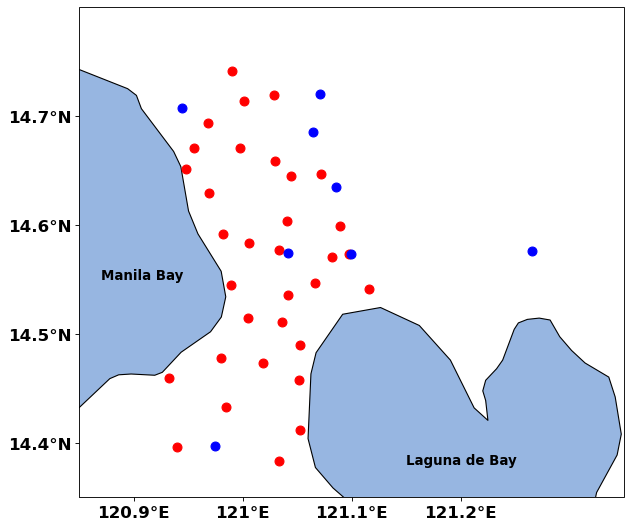

In [5]:
def set_plotarea(ax, projection) -> None:
    ax.set_extent(
        [
            120.85,
            121.35,
            14.35,
            14.80,
        ],
        crs=projection,
    )

fig = plt.figure(figsize=(8, 8), dpi=80)
projection = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=projection)
set_plotarea(ax, projection)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.coastlines()

# Add makers
for idx, (y, x) in enumerate(lonlats):
    if idx < 33:
        color = 'red'
    else:
        color = 'blue'
    plt.plot(x, y, marker='o', markersize=8, color=color)

# Add bay name
plt.text(120.87, 14.55, 'Manila Bay', fontsize=12, color='black', fontweight='bold')

# Add lake name
plt.text(121.15, 14.38, 'Laguna de Bay', fontsize=12, color='black', fontweight='bold')

# Ticks
ax.set_xticks([120.9, 121.0, 121.1, 121.2], crs=projection)
ax.set_yticks([14.4, 14.5, 14.6, 14.7], crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
for ticklabels in (ax.get_xticklabels(), ax.get_yticklabels()):
    for obj in ticklabels:
        obj.set_fontweight('bold')
        obj.set_fontsize(15)
plt.tight_layout()
plt.savefig('poteka-distribution-map.eps', format='eps', bbox_inches='tight')
plt.show()
plt.close()